In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import miser3 as miser

In [2]:
# to create 'mep.oct' run from terminal
# bin/mepd lattices/bessarab.lat -o
sys, mypath, ergy, distance=miser.load_results('../tmp/mep.oct')

H SZ BC TRANSLATIONS CELL BONDS K K0 mu J D PATH ENERGY DISTANCE DIFF TDIFF CONTRIBUTIONS 


In [3]:
hessian=sys.lambda_hessian()
contr=sys.lambda_energy_contributions()

In [4]:
for n in range(mypath.shape[0]):
    e=sys.energy(mypath[n], hessian(mypath[n]))[0]
    e2=contr(mypath[n])[-1]
    print(e, e2, ergy[n,-1])
print('Barrier', np.max(ergy[:,-1])-ergy[0,-1])

-4208.8 -4208.8 -4208.8
-4205.47416724 -4205.47416724 -4205.47416724
-4196.35019918 -4196.35019918 -4196.35019918
-4183.11879409 -4183.11879409 -4183.11879409
-4167.21386368 -4167.21386368 -4167.21386368
-4151.64417113 -4151.64417113 -4151.64417113
-4138.88507248 -4138.88507248 -4138.88507248
-4129.74793781 -4129.74793781 -4129.74793781
-4123.86126409 -4123.86126409 -4123.86126409
-4120.65499913 -4120.65499913 -4120.65499913
-4118.92327561 -4118.92327561 -4118.92327561
-4118.1324393 -4118.1324393 -4118.1324393
-4118.10984795 -4118.10984795 -4118.10984795
-4119.1256237 -4119.1256237 -4119.1256237
-4120.98855753 -4120.98855753 -4120.98855753
-4124.08174481 -4124.08174481 -4124.08174481
-4129.00013379 -4129.00013379 -4129.00013379
-4136.35259527 -4136.35259527 -4136.35259527
-4146.52963137 -4146.52963137 -4146.52963137
-4159.31591253 -4159.31591253 -4159.31591253
-4173.62589588 -4173.62589588 -4173.62589588
-4187.57129312 -4187.57129312 -4187.57129312
-4198.94486337 -4198.94486337 -4198.9

In [5]:
hess0, N0, embed0, project0, ergy0, grad0=sys.lambda_restricted_hessian(mypath[0], hessian=hessian)
saddle_idx=np.argmax(ergy[:,-1]); saddle=mypath[saddle_idx]
hessS, NS, embedS, projectS, ergyS, gradS=sys.lambda_restricted_hessian(saddle, hessian=hessian)

Gradient at minimum 0.0
Gradient at saddle point 1.48577951585


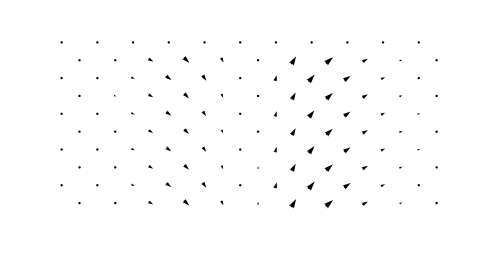

In [35]:
pgrad0=miser.project_to_tangent_space(mypath[0], grad0)
print('Gradient at minimum', np.sqrt(np.sum(pgrad0**2)))
pgradS=miser.project_to_tangent_space(saddle, gradS)
print('Gradient at saddle point', np.sqrt(np.sum(pgradS**2)))
sys.plot_field(pgradS)
plt.show()

In [9]:
M0=miser.matrix(hess0)
MS=miser.matrix(hessS)

In [10]:
eig0, eiv0=np.linalg.eigh(M0)
eigS, eivS=np.linalg.eigh(MS)

In [11]:
print('Hessian lowest eigenvalues')
print('Minimum', eig0[:5])
print('Saddle', eigS[:5])

Hessian lowest eigenvalues
Minimum [ 2.4         3.42614127  6.4644432   8.29336489  8.4       ]
Saddle [-0.18679523  2.27119474  4.48141424  5.7352116   5.8699375 ]


In [12]:
data0=sys.restricted_harmonic(mypath[0], hessian=hessian)
dataS=sys.restricted_harmonic(saddle, hessian=hessian)

In [13]:
ergy0, area0, pei0, nei0, c0=data0
ergyS, areaS, peiS, neiS, cS=dataS

In [24]:
print(pei0.shape, peiS.shape)
print(np.sqrt(np.prod(pei0[1:]/peiS)*pei0[0]))
print(np.sqrt(np.sum(cS*cS*peiS)))
print(np.sqrt(np.sum(cS*cS/peiS)))

(188,) (187,)
111.859551862
2.42410504388
0.412666586391


In [28]:
# gamma = 2*mu_B/hbar = 2*mu_B/(6.5821195E-13 meV*s)=0.3038534E13 mu_B/(meV*s)
# mu = 2 mu_B.

print('Pre-exp', miser.rate(data0, dataS, threegammaovermu=0.3038534E13/2)[0])
print('Pavel value {:e}'.format(8.1637E13))

Pre-exp 6.55660086372e+13
Pavel value 8.163700e+13


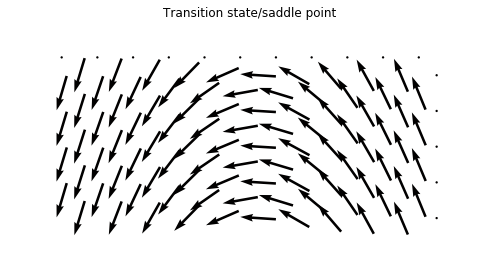

In [13]:
sys.plot_field(mypath[np.argmax(ergy[:,-1])])
plt.title('Transition state/saddle point')
plt.show()

In [14]:
sys.plot_path(mypath)

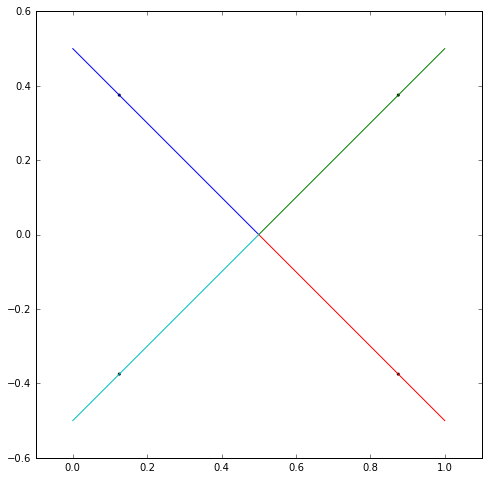

In [15]:
sys.plot_stencil()
plt.show()

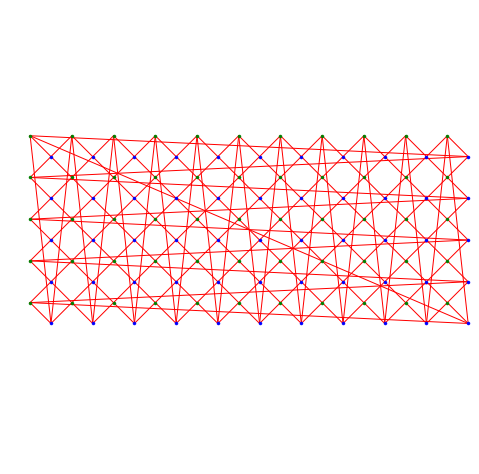

In [16]:
sys.plot()
plt.show()

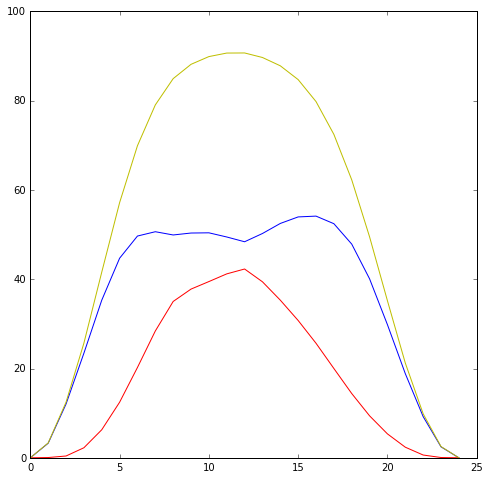

In [17]:
plt.plot(ergy-ergy[-1,:])
plt.show()